TO-DO
    -Include keyword synonyms in TF-IDF
    -Should we stem the targets and input text?
    -POS and structure
    -The paragraphs need to be rolled up by Policy Area/Sector
    xAdd n-gram catcher (maybe replace origional text with de-spaced ngram)
    -Should script just make one large df and do lookups?  
    -Dynamic section discovery (script is able to identify Executive Summary on its own)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid',font="calibri")
#sns.set(style="white)

stemmer = PorterStemmer()
dir = 'C:\\Users\\Travis Park\\Google Drive\\UN\\Team MOZART RAP\\'

In [2]:
SDG_Targets = pd.read_excel(dir +'SDG.xlsx', names = ['ID', 'Target'],sheetname = 'Sheet1')

In [3]:
SDG_Targets.head()

,ID,Target
0,1.2,"By 2030, reduce at least by half the proporti..."
1,1.3,Implement nationally appropriate social prote...
2,1.4,"By 2030, ensure that all men and women, in pa..."
3,1.5,"By 2030, build the resilience of the poor and..."
4,2.1,"By 2030, end hunger and ensure access by all ..."


In [4]:
#writes country SDG report to list 'f' split by paragraph
f = open(dir + 'Bhutan_doc_test.txt', 'r')
f = f.read().replace('. \n\n','.\n\n').split('.\n\n')
f = [w.replace('\n',' ') for w in f]
for w in f:
    if len(w) <= 100:
        f.remove(w)
    w = stemmer.stem(w)

In [5]:
len(f)

1049

In [6]:
input_text = f
test_input_text = f

In [7]:
vectorizer =TfidfVectorizer(stop_words='english', lowercase = True, ngram_range=(1,3), max_df=0.9, min_df= 0.1) 

In [10]:
targets = []

def process_targets(df_targets):
    #appends all targets in file to a dataframe

    targets.clear()
    b = 0
    while b < len(df_targets):
        targets.append(df_targets['Target'][b])
        b=b+1

In [11]:
process_targets(SDG_Targets)
lentarget = len(targets)
lentarget

122

In [12]:
test_all_docs = targets + test_input_text
len(test_all_docs)

1171

In [13]:
x = vectorizer.fit_transform(test_all_docs)
y = pd.DataFrame((x * x.T).A)
z = y.ix[lentarget-1:,:lentarget-1]
z.columns = list(SDG_Targets['ID'])

In [14]:
z.replace(0,'')
z.head()

,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,3.1,...,17.9,17.11,17.12,17.13,17.14,17.15,17.16,17.17,17.18,17.19
121,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.71011,0.000000,0.0,...,0.876774,0.0,0.000000,0.0,0.761841,0.593764,0.761841,0.0,0.294021,1.0
122,0.171956,0.0,0.000000,0.000000,0.151807,0.0,0.000000,0.00000,0.162112,0.0,...,0.123953,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.099064,0.0
123,0.000000,0.0,0.037662,0.101145,0.134258,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
124,0.000000,0.0,0.199527,0.000000,0.362295,0.0,0.325929,0.00000,0.336453,0.0,...,0.000000,0.0,0.432766,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
125,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [31]:
z1=z.unstack().reset_index()
z1.columns = ['Target','Paragraph','CosineSimilarity']
z1['Paragraph'] = z1['Paragraph'] - lentarget+1
z1['Target'].apply(str)
z1 = z1[(z1.CosineSimilarity != 0)].sort(['CosineSimilarity'])
z1.head()

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Target,Paragraph,CosineSimilarity
29409,5.4,9,0.005774
82959,14.1,9,0.008046
35709,6.4,9,0.008610
25928,4.7,728,0.008726
16809,3.8,9,0.008764


In [32]:
z1.to_csv(dir + 'TFIDF_2.csv')

In [29]:
avg = pd.pivot_table(z1, values = 'CosineSimilarity',index = 'Target', aggfunc='mean')
cnt = pd.pivot_table(z1, values = 'CosineSimilarity',index = 'Target', aggfunc='count')

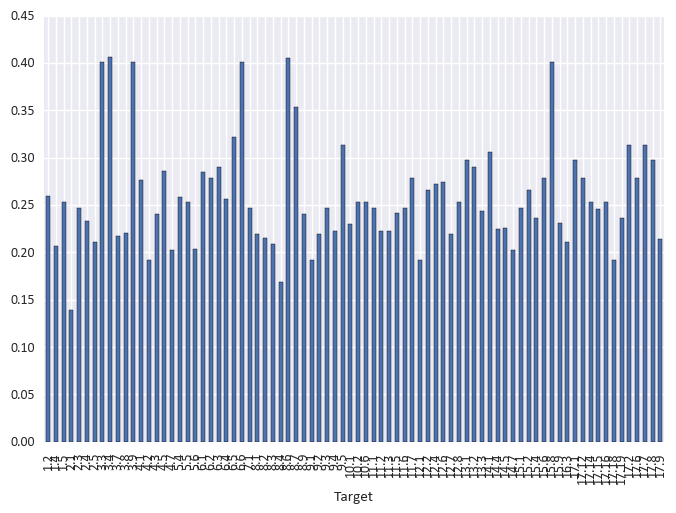

In [30]:
avg.plot(kind = 'bar')

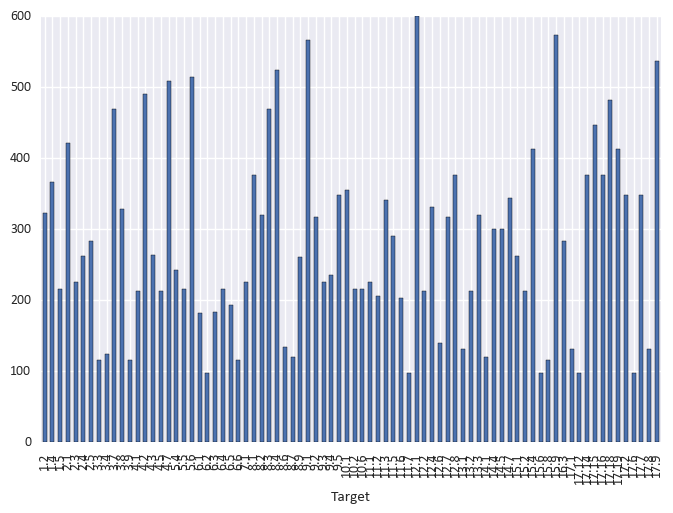

In [20]:
cnt.plot(kind = 'bar')

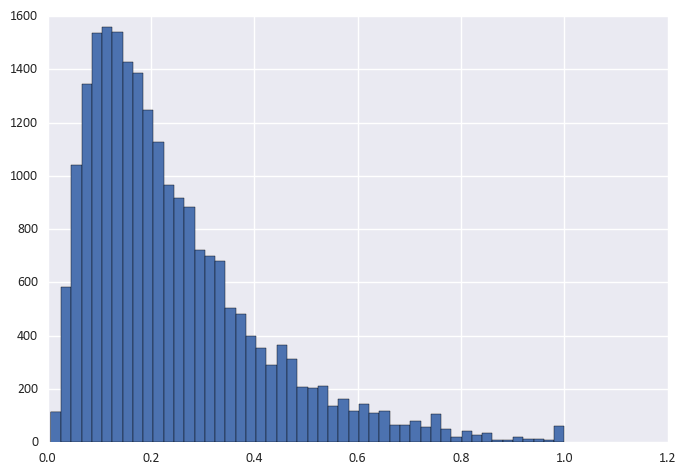

In [21]:
z1['CosineSimilarity'].hist(bins = 50)

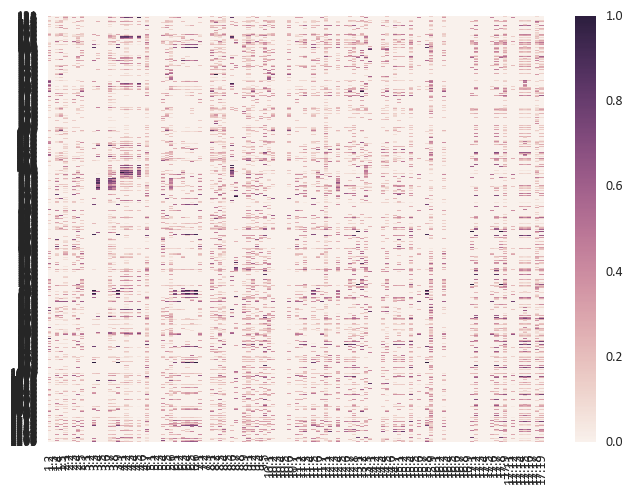

In [23]:
sns.heatmap(z)

In [24]:
top = cnt.to_frame().copy()
top = top.sort('CosineSimilarity', ascending = 0).head(10)
x = list(top.index)
x

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


[12.1,
 15.9,
 9.0999999999999996,
 17.899999999999999,
 8.4000000000000004,
 5.5999999999999996,
 4.7000000000000002,
 4.2000000000000002,
 17.18,
 3.7000000000000002]

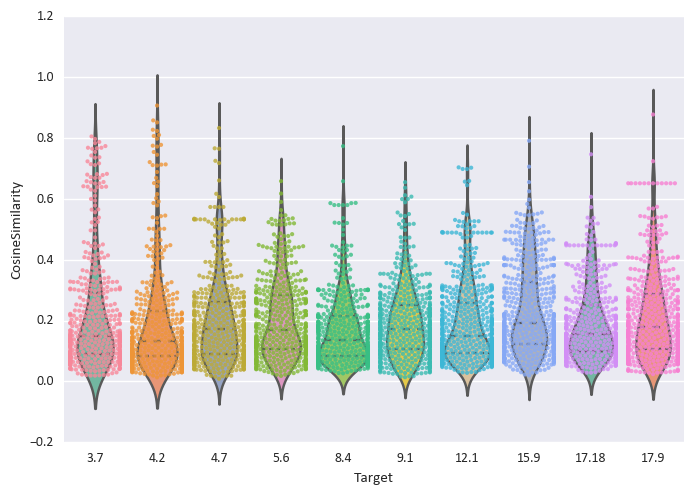

In [25]:
z2 = z1[z1['Target'].isin(x)]
sns.violinplot(x="Target", y="CosineSimilarity", data=z2, size=5,palette="Set2", inner = 'quartile')
#sns.stripplot(x="Target", y="CosineSimilarity", data=z2, jitter=0.25, size = 3, alpha = .5, palette='Red_r')
sns.swarmplot(x="Target", y="CosineSimilarity", data=z2, size = 3, alpha = .8)

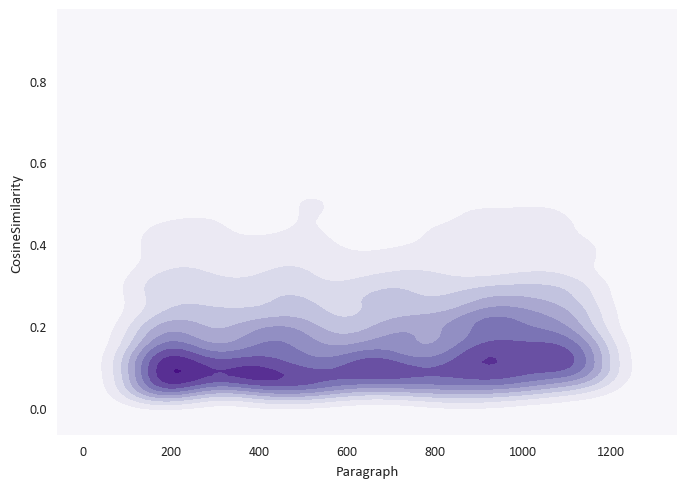

In [26]:
sns.kdeplot(z2['Paragraph'],z2['CosineSimilarity'], shade = True, cmap = 'Purples')